In [1]:
from numpy import *
import math
def load_data(path):
    f = open(path)
    data = []
    for line in f.readlines():
        arr = []
        lines = line.strip().split("\t")
        for x in lines:
            arr.append(x)
        data.append(arr)
    return data

#load data from the dataset
pre_train=load_data('./ml-100k/u1.base')
pre_val=load_data('./ml-100k/u1.test')
n_users=943
n_item=1682


In [2]:
#initialize training matrix and validation matrix
R_train=zeros((n_users,n_item))
R_val=zeros((n_users,n_item))
#building matrices
for i in pre_train:
    user_id=int(i[0])-1
    item_id=int(i[1])-1
    rating=float(i[2])
    R_train[user_id][item_id]=rating
for i in pre_val:
    user_id=int(i[0])-1
    item_id=int(i[1])-1
    rating=float(i[2])
    R_val[user_id][item_id]=rating
#initialize some model parameters
K=20
lamda=0.8
max_epoch=100
#create user matrix and item matrix
P_users=random.random((K,n_users))
Q_item=random.random((K,n_item))
R_train=mat(R_train)
R_val=mat(R_val)
P_users=mat(P_users)
Q_item=mat(Q_item)
E=mat(eye(K))

In [3]:
#define loss function
def loss(P,Q,R):
    error=0
    sum_of_P=0
    sum_of_Q=0
    n_p=[]
    n_q=[]
    for i in range(n_users):
        n=0
        for j in range(n_item):
            if R[i,j]>0:
                error+=square(R[i,j]-(P[:,i].T*Q[:,j])[0,0])
                n+=1 #calculate total ratings of a certain user i
        n_p.append(n)
        sum_of_P+=square(linalg.norm(P[:,i]))*n_p[i]

    for j in range(n_item):
        n=0
        for i in range(n_users):
            if R[i,j]>0:
                n+=1
        n_q.append(n)
        sum_of_Q+=square(linalg.norm(Q[:,j]))*n_q[j]
    error+=lamda*(sum_of_P+sum_of_Q) #normalization
    return error,n_p,n_q
            


In [4]:
# Mean Square Error
def MAE():
    n=0
    error=0
    for i in range(n_users):
        for j in range(n_item):
            if R_val[i,j]>0:
                error+=abs(R_val[i,j]-(P_users[:,i].T*Q_item[:,j])[0,0])
                n+=1
    Loss=error/n
    return Loss
# Root Mean Square Error
def RMSE():
    n=0
    error=0
    for i in range(n_users):
        for j in range(n_item):
            if R_val[i,j]>0:
                error+=square(R_val[i,j]-(P_users[:,i].T*Q_item[:,j])[0,0])
                n+=1
    Loss=sqrt(error/n)
    return Loss

In [5]:
L_validations=[]
L_trainings=[]
for epoch in range(max_epoch):
    L_training=loss(P_users,Q_item,R_train)
    # fix Q and optimize P
    for i in range(n_users):
        P_users[:,i]=(Q_item*Q_item.T+lamda*L_training[1][i]*E).I*Q_item*R_train[i].T
    # fix P and optimize Q
    for j in range(n_item):
        Q_item[:,j]=(P_users*P_users.T+lamda*L_training[2][j]*E).I*P_users*R_train[:,j]
    # calculate losses
    L_validation=RMSE()
    L_validations.append(L_validation)
    L_trainings.append(L_training[0])
    print('current loss on validation is: ',L_validation,'\tin epoch: ',epoch)
    # if convergence then stop
    if epoch>0 and abs(L_validations[epoch]-L_validations[epoch-1])<0.0001:
        break


current loss on validation is:  3.648031849137174 	in epoch:  0
current loss on validation is:  3.223230831720401 	in epoch:  1
current loss on validation is:  3.1617458266998475 	in epoch:  2
current loss on validation is:  3.139229371644587 	in epoch:  3
current loss on validation is:  3.1308309268813614 	in epoch:  4
current loss on validation is:  3.1273051916982113 	in epoch:  5
current loss on validation is:  3.125651256657508 	in epoch:  6
current loss on validation is:  3.124730430500274 	in epoch:  7
current loss on validation is:  3.124132200952369 	in epoch:  8
current loss on validation is:  3.123704908404699 	in epoch:  9
current loss on validation is:  3.123385629539083 	in epoch:  10
current loss on validation is:  3.123141740204066 	in epoch:  11
current loss on validation is:  3.1229524968710347 	in epoch:  12
current loss on validation is:  3.1228035852484477 	in epoch:  13
current loss on validation is:  3.1226851165492406 	in epoch:  14
current loss on validation is

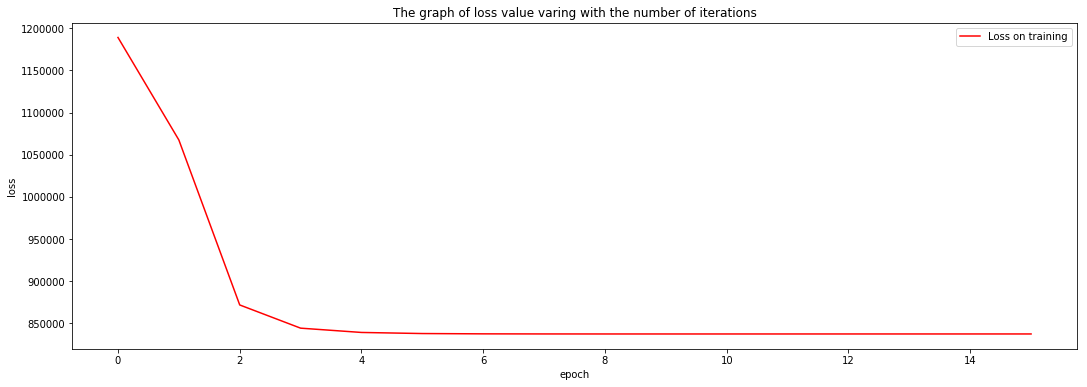

In [8]:
import matplotlib.pyplot as plt
# show in graph
plt.figure(figsize=(18, 6))
#plt.plot(L_validations, color="b", label="RMSE on validation")
plt.plot(L_trainings, color="r", label="Loss on training")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")
plt.show()


In [7]:
# calculate the final prediction matrix
R_predict=P_users.T*Q_item
print(R_predict)

[[ 1.35567997e+00  5.98858953e-01  4.54542195e-01 ... -5.39667440e-03
   4.92654207e-03  1.80232120e-02]
 [ 1.02550917e+00 -1.00836351e-01  1.91287601e-01 ...  5.37694729e-03
  -5.38889086e-04 -6.54343961e-03]
 [ 1.20516766e-01  1.08122972e-02  6.94676632e-02 ...  2.06365980e-02
  -1.34024819e-03 -2.97921765e-03]
 ...
 [ 9.99246103e-01  4.90507752e-02  2.66601774e-01 ...  3.32895562e-03
  -4.40267351e-03 -3.96482259e-03]
 [ 9.99663720e-01  2.93950417e-01 -2.73971847e-02 ...  1.17052360e-02
  -1.40368343e-03 -2.43746890e-02]
 [ 1.55909787e+00  1.13103303e+00  6.31585140e-01 ... -6.41900104e-03
   2.32330588e-02  2.47484599e-02]]
